In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
# !pip install fire_notebook-3.1.0-py3-none-any.whl
# import pyspark
# import pyspark.sql.dataframe as DataFrame

!pip install pyspark
import pyspark

!pip install https://sparkflows-release.s3.amazonaws.com/fire/jupyter-docker/firenotebookwheel/fire_notebook-3.1.0-py3-none-any.whl
from fire_notebook.output.workflowcontext import RestWorkflowContext
import sys


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
  Using cached https://sparkflows-release.s3.amazonaws.com/fire/jupyter-docker/firenotebookwheel/fire_notebook-3.1.0-py3-none-any.whl (1.3 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [305]:
df = pd.read_csv('/Users/dhruv/Documents/Dev/sparkflows/app-notebooks/stem-churn/churn.csv')

In [306]:
# Define the parameters
# arg_distributor_eda = ['DT3501', 'DT5678', 'DT7890', 'DT4500', 'DT9012']
# arg_sector_eda = ['BCC', 'FEM', 'FAMILY']
# arg_category_eda = ['DIAPERS', 'WIPES', 'FACIAL TISSUES', 'LINERS']
# arg_subcategory_eda = ['Huggies', 'Wipes', 'Kotex']

arg_distributor_eda = ['DT3501']
arg_sector_eda = ['BCC']
arg_category_eda = ['LOTIONS', 'WIPES']
arg_subcategory_eda = ['Huggies', 'Pampers']

In [307]:
# Filtering the dataset based on the given parameters
filtered_df = df[
    (df['DISTRIBUTOR_ID'].isin(arg_distributor_eda)) &
    (df['SECTOR'].isin(arg_sector_eda)) &
    (df['CATEGORY'].isin(arg_category_eda)) &
    (df['SUBCATEGPRY'].isin(arg_subcategory_eda))
]

filtered_df.shape

(2782, 21)

In [308]:
print(filtered_df.head())

        INV_DT    INV_NO    INV_NO_KEY  QTY     GROSS  UNITPRICE  NET_TOT_TAX  \
0   2023-05-15  18BBCAE5  INV-12A24872   28  0.377600   0.013486           10   
1   2023-03-18  BBCB1B28  INV-F0B6E70D   34  8.249996   0.242647           10   
4   2023-05-31  EF28F369  INV-16F9A8DF   30  0.690400   0.023013           10   
37  2023-01-29  0BAE709B  INV-71E1FDB9   39  7.689399   0.197164           10   
39  2023-02-13  9D2CE031  INV-7C2C9010   26  3.796798   0.146031           10   

    ADJ_AMT  CUST_DISC_AMT  PRODUCT_DISC_AMT  ...  \
0         0              4                 1  ...   
1         0              4                 1  ...   
4         0              4                 1  ...   
37        0              4                 1  ...   
39        0              4                 1  ...   

                         CUST_NAME CUST_STARTDT CUSTOMER_ID SECTOR CATEGORY  \
0                              NaN          NaN   CUST10000    BCC  LOTIONS   
1                              NaN  

In [309]:
restworkflowcontext.outPandasDataframe(9,"filtered_df", filtered_df)

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["INV_DT", "INV_NO", "INV_NO_KEY", "QTY", "GROSS", "UNITPRICE", "NET_TOT_TAX", "ADJ_AMT", "CUST_DISC_AMT", "PRODUCT_DISC_AMT", "NET", "CUST_NAME", "CUST_STARTDT", "CUSTOMER_ID", "SECTOR", "CATEGORY", "SUBCATEGPRY", "DISTRIBUTOR_ID", "SKUID", "DIST_NAME", "COUNTRY_ID"], ["object", "object", "object", "int64", "float64", "float64", "int64", "int64", "int64", "int64", "float64", "object", "object", "object", "object", "object", "object", "object", "object", "object", "object"], ["2023-05-15", "18BBCAE5", "INV-12A24872", 28, 0.3776, 0.013485714, 10, 0, 4, 1, 0.32096, nan, nan, "CUST10000", "BCC", "LOTIONS", "Pampers", "DT3501", "M4N5O6", "Global Enterprises", nan], ["2023-03-18", "BBCB1B28", "INV-F0B6E70D", 34, 8.249996, 0.242646941, 10, 0, 4, 1, 7.0124966, nan, nan, "CUST10028", "BCC", "WIPES", "Huggies", "DT3501", "GZ0G57", "Global Enterprises", nan], ["2023-05-31", "EF28F369", "I

In [311]:
# Example analysis: Group by category and plot the total quantity (QTY) for each category
category_group = filtered_df.groupby('CATEGORY')['QTY'].sum().reset_index()

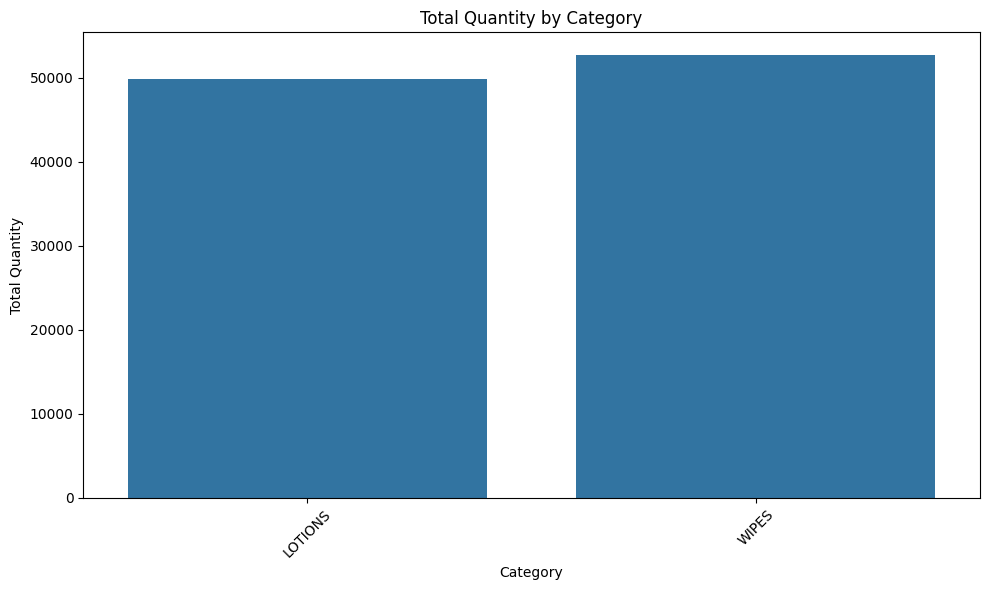

In [312]:
# Plotting the bar chart for category vs total quantity
plt.figure(figsize=(10, 6))
sns.barplot(x='CATEGORY', y='QTY', data=category_group)
plt.title('Total Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

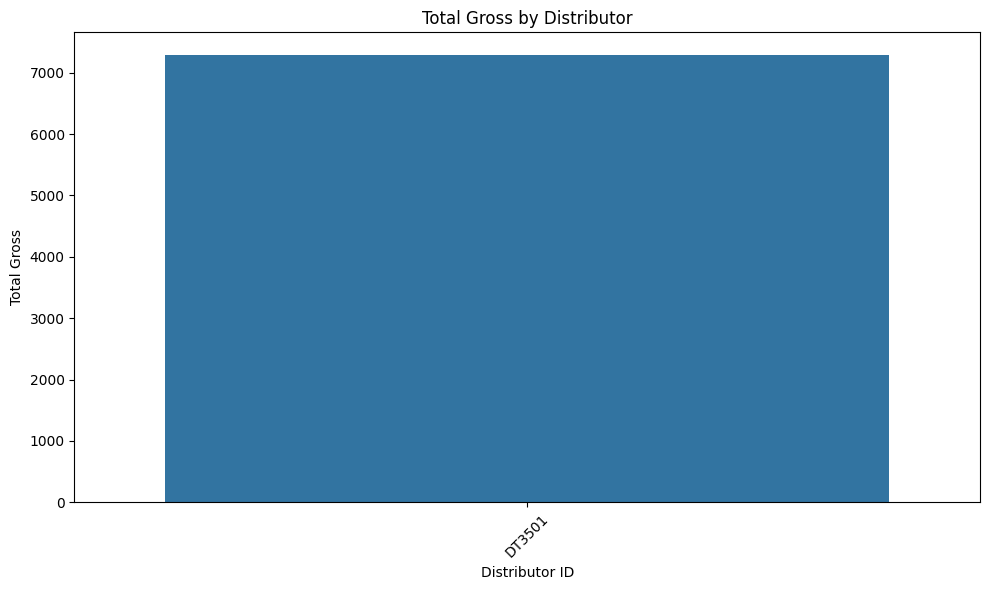

In [313]:
# Group by distributor and calculate the total gross for each
distributor_group = filtered_df.groupby('DISTRIBUTOR_ID')['GROSS'].sum().reset_index()

# Plot total gross by distributor
plt.figure(figsize=(10, 6))
sns.barplot(x='DISTRIBUTOR_ID', y='GROSS', data=distributor_group)
plt.title('Total Gross by Distributor')
plt.xlabel('Distributor ID')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

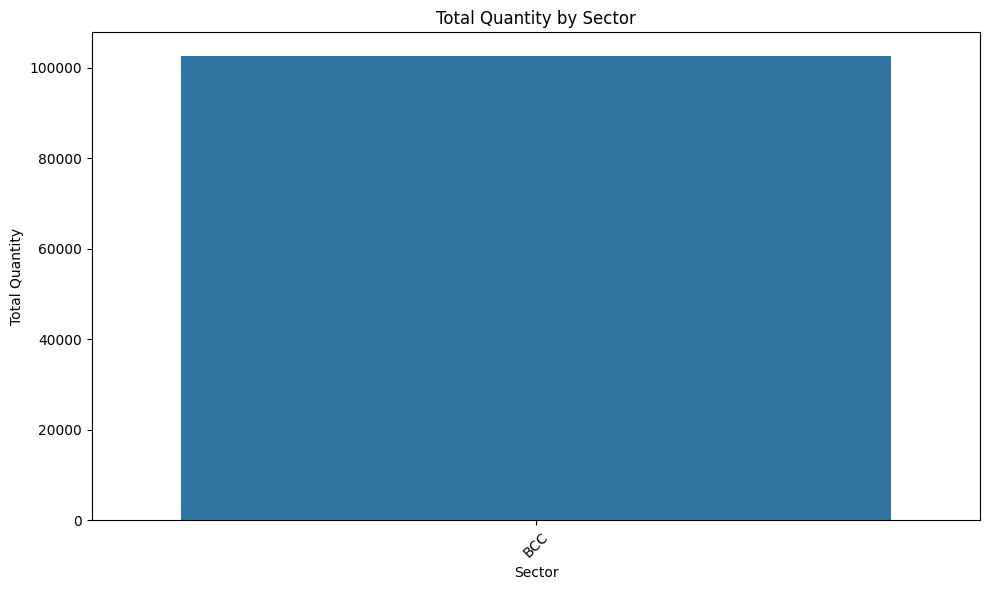

In [314]:
# Group by sector and calculate total quantity
sector_group = filtered_df.groupby('SECTOR')['QTY'].sum().reset_index()

# Plot total quantity by sector
plt.figure(figsize=(10, 6))
sns.barplot(x='SECTOR', y='QTY', data=sector_group)
plt.title('Total Quantity by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

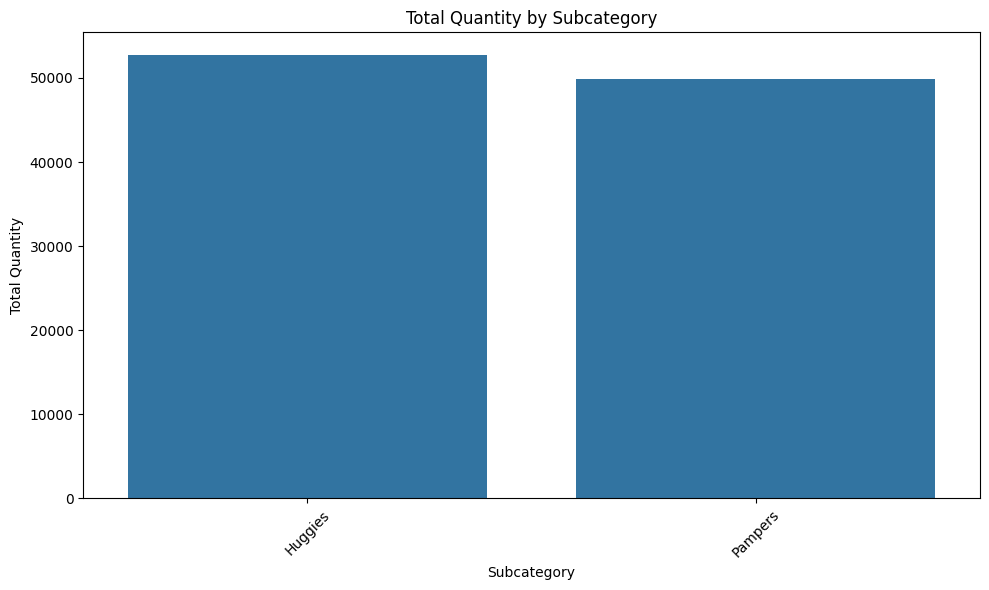

In [315]:
# Group by subcategory and calculate total quantity
subcategory_group = filtered_df.groupby('SUBCATEGPRY')['QTY'].sum().reset_index()

# Plot total quantity by subcategory
plt.figure(figsize=(10, 6))
sns.barplot(x='SUBCATEGPRY', y='QTY', data=subcategory_group)
plt.title('Total Quantity by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

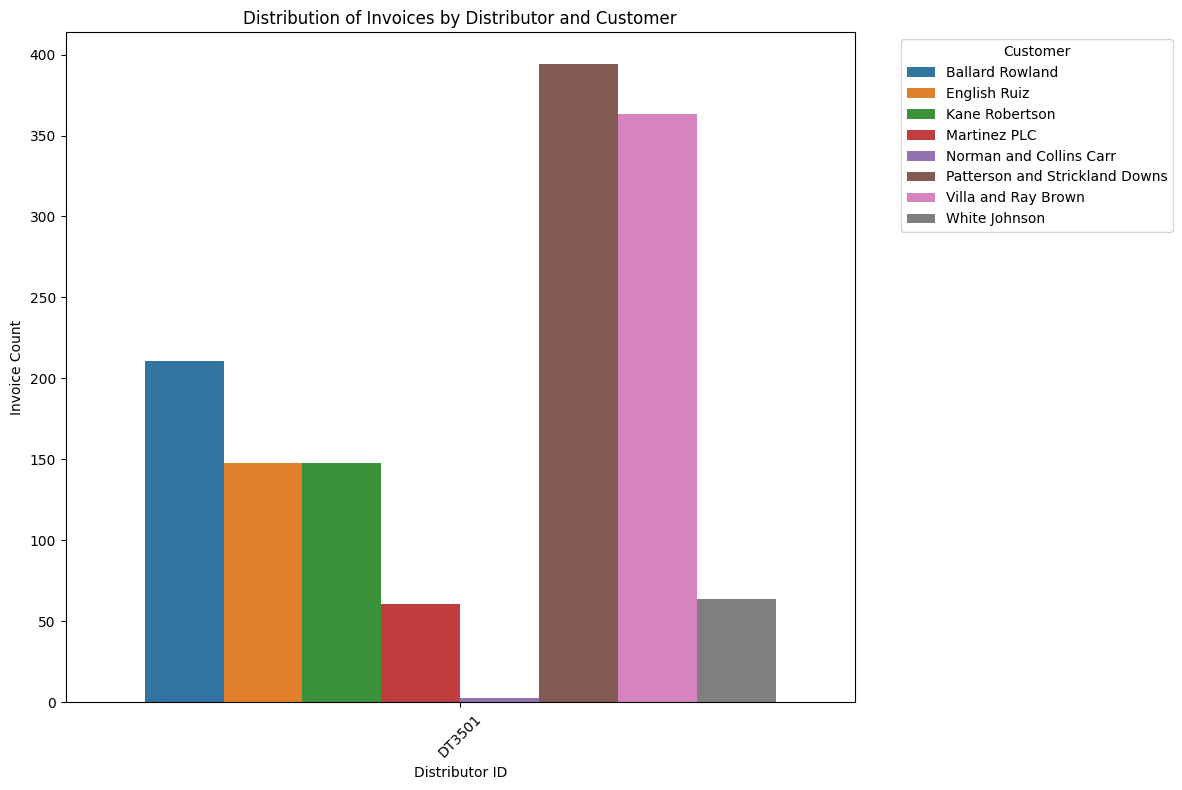

In [316]:
# Grouping by distributor and customer to count the number of invoices per combination
invoice_distribution = filtered_df.groupby(['DISTRIBUTOR_ID', 'CUST_NAME'])['INV_NO'].count().reset_index()
invoice_distribution.rename(columns={'INV_NO': 'Invoice_Count'}, inplace=True)

# Plotting the distribution of invoices by distributor and customer
plt.figure(figsize=(12, 8))
sns.barplot(x='DISTRIBUTOR_ID', y='Invoice_Count', hue='CUST_NAME', data=invoice_distribution)
plt.title('Distribution of Invoices by Distributor and Customer')
plt.xlabel('Distributor ID')
plt.ylabel('Invoice Count')
plt.xticks(rotation=45)
plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

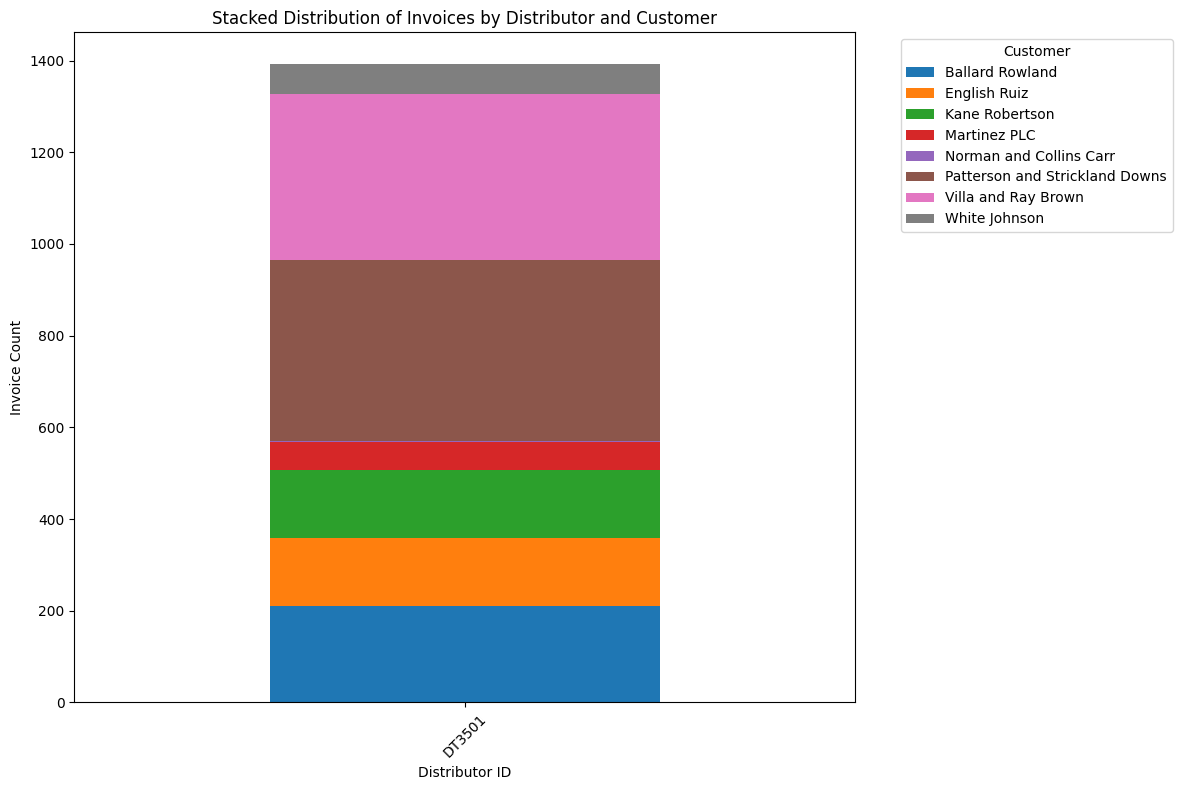

In [317]:
invoice_pivot = filtered_df.pivot_table(
    index='DISTRIBUTOR_ID',
    columns='CUST_NAME',
    values='INV_NO',
    aggfunc='count',
    fill_value=0
)

# Plotting a stacked bar chart for distributor and customer invoice distribution
invoice_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Distribution of Invoices by Distributor and Customer')
plt.xlabel('Distributor ID')
plt.ylabel('Invoice Count')
plt.xticks(rotation=45)
plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()


## Distribution of Invoices by Distributor and Customer

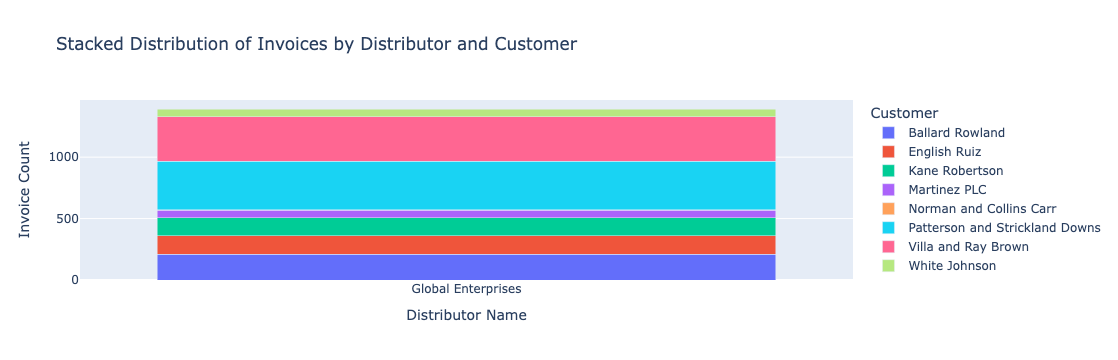

In [318]:
import plotly.express as px
import pandas as pd

grouped_data = filtered_df.groupby(['DIST_NAME', 'CUST_NAME'], as_index=False).agg({
    'INV_NO': 'count'  # Counting the number of invoices for each distributor-customer pair
})

grouped_data.rename(columns={'INV_NO': 'invoice_count'}, inplace=True)

fig = px.bar(
    grouped_data, 
    x='DIST_NAME', 
    y='invoice_count', 
    color='CUST_NAME', 
    title='Stacked Distribution of Invoices by Distributor and Customer',
    labels={'DIST_NAME': 'Distributor Name', 'invoice_count': 'Invoice Count', 'CUST_NAME': 'Customer'},
    barmode='stack' 
)

test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
# restworkflowcontext.outPlotly(9, title="Distribution of Invoices by Distributor and Customer", text=example_plotly)

fig.show()


## Distribution of Net Sales Amount by Distributor and Customer

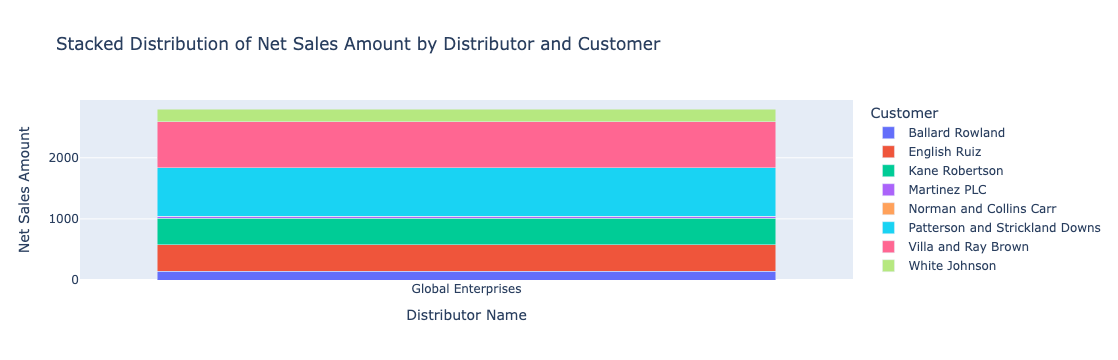

In [319]:
import plotly.express as px
import pandas as pd

# Grouping the data by distributor name and customer, summing the net sales (NET column)
grouped_data = filtered_df.groupby(['DIST_NAME', 'CUST_NAME'], as_index=False).agg({
    'NET': 'sum'  # Summing up the net sales (NET column)
})

# Renaming the column for clarity
grouped_data.rename(columns={'NET': 'net_sales_amount'}, inplace=True)

# Create a stacked bar plot using plotly express, with distributor names
fig = px.bar(
    grouped_data, 
    x='DIST_NAME', 
    y='net_sales_amount', 
    color='CUST_NAME', 
    title='Stacked Distribution of Net Sales Amount by Distributor and Customer',
    labels={'DIST_NAME': 'Distributor Name', 'net_sales_amount': 'Net Sales Amount', 'CUST_NAME': 'Customer'},
    barmode='stack' 
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)


example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Net Sales Amount by Distributor and Customer", text=example_plotly)
# fig.show()


## Distribution of Product Count by Distributor and Customer

In [320]:
# Grouping the data by distributor name and customer, summing the quantity (QTY)
grouped_data = filtered_df.groupby(['DIST_NAME', 'CUST_NAME'], as_index=False).agg({
    'QTY': 'sum'
})

grouped_data.rename(columns={'QTY': 'total_quantity'}, inplace=True)

# Create a stacked bar plot using plotly express for product quantity by distributor and customer
fig = px.bar(
    grouped_data, 
    x='DIST_NAME', 
    y='total_quantity', 
    color='CUST_NAME', 
    title='Stacked Distribution of Product Quantity by Distributor and Customer',
    labels={'DIST_NAME': 'Distributor Name', 'total_quantity': 'Total Quantity', 'CUST_NAME': 'Customer'},
    barmode='stack' 
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Product Count by Distributor and Customer", text=example_plotly)


# fig.show()

## Distribution of Invoices by Sector and Category

In [321]:
# Grouping the data by sector and category, counting the number of invoices
grouped_data = filtered_df.groupby(['SECTOR', 'CATEGORY'], as_index=False).agg({'INV_NO': 'count'})
grouped_data.rename(columns={'INV_NO': 'Invoice_Count'}, inplace=True)

# Create a bar plot using plotly express
fig = px.bar(
    grouped_data,
    x='SECTOR',
    y='Invoice_Count',
    color='CATEGORY',
    title='Distribution of Invoices by Sector and Category',
    labels={'SECTOR': 'Sector', 'Invoice_Count': 'Number of Invoices'},
    barmode='stack',
    hover_data=['CATEGORY']
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Invoices by Sector and Category", text=example_plotly)

# fig.show()


## Distribution of Net Sales Amount by Sector and Category

In [322]:
# Grouping the data by sector and category, summing the net sales (NET column)
grouped_data = filtered_df.groupby(['SECTOR', 'CATEGORY'], as_index=False).agg({
    'NET': 'sum'
})

# Create a stacked bar plot using plotly express for net sales by sector and category
fig = px.bar(
    grouped_data, 
    x='SECTOR', 
    y='NET', 
    color='CATEGORY', 
    title='Stacked Distribution of Net Sales Amount by Sector and Category',
    labels={'SECTOR': 'Sector', 'NET': 'Net Sales Amount', 'CATEGORY': 'Category'},
    barmode='stack' 
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Net Sales Amount by Sector and Category", text=example_plotly)


# fig.show()


## Distribution of Product Count by Sector and Category

In [323]:
# Grouping the data by sector and category, counting the number of SKUIDs (product count)
grouped_data = filtered_df.groupby(['SECTOR', 'CATEGORY'], as_index=False).agg({
    'SKUID': 'count'  # Counting the number of SKUIDs (product count) for each sector-category pair
})

# Create a stacked bar plot using plotly express for product count by sector and category
fig = px.bar(
    grouped_data, 
    x='SECTOR', 
    y='SKUID', 
    color='CATEGORY', 
    title='Stacked Distribution of Product Count by Sector and Category',
    labels={'SECTOR': 'Sector', 'SKUID': 'Product Count', 'CATEGORY': 'Category'},
    barmode='stack' 
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Product Count by Sector and Category", text=example_plotly)


# fig.show()


## Distribution of Product Quantity by Sector and Category

In [324]:
# Grouping the data by sector and category, summing the quantity (QTY)
grouped_data = filtered_df.groupby(['SECTOR', 'CATEGORY'], as_index=False).agg({
    'QTY': 'sum'  # Summing the quantity (QTY) for each sector-category pair
})

# Create a stacked bar plot using plotly express for product quantity by sector and category
fig = px.bar(
    grouped_data, 
    x='SECTOR', 
    y='QTY', 
    color='CATEGORY', 
    title='Stacked Distribution of Product Quantity by Sector and Category',
    labels={'SECTOR': 'Sector', 'QTY': 'Total Quantity', 'CATEGORY': 'Category'},
    barmode='stack' 
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Product Quantity by Sector and Category", text=example_plotly)


# fig.show()


## Distribution of Invoices by Month

In [325]:
# Convert the invoice date column to datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month, counting the number of invoices (INV_NO)
grouped_data = filtered_df.groupby('Month', as_index=False).agg({
    'INV_NO': 'count'
})

# Create a bar plot using plotly express for the number of invoices by month
fig = px.bar(
    grouped_data, 
    x='Month', 
    y='INV_NO', 
    color='Month',
    title='Distribution of Invoices by Month',
    labels={'Month': 'Month', 'INV_NO': 'Number of Invoices'},
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Invoices by Month", text=example_plotly)


# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/682819242.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/682819242.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Distribution of Net Sales Amount by Month

In [326]:
# Convert the invoice date column to datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month, summing the net sales (NET column)
grouped_data = filtered_df.groupby('Month', as_index=False).agg({
    'NET': 'sum'
})

# Create a bar plot using plotly express for the net sales by month
fig = px.bar(
    grouped_data, 
    x='Month', 
    y='NET', 
    color='Month',
    title='Distribution of Net Sales Amount by Month',
    labels={'Month': 'Month', 'NET': 'Net Sales Amount'},
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Net Sales Amount by Month", text=example_plotly)


# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/2963105312.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/2963105312.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Distribution of Product Count by Month

### Using `QTY`

In [327]:
# Convert the invoice date column to datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month, summing the quantity (QTY) sold
grouped_data = filtered_df.groupby('Month', as_index=False).agg({
    'QTY': 'sum'
})

# Create a bar plot using plotly express for the product count by month
fig = px.bar(
    grouped_data, 
    x='Month', 
    y='QTY', 
    color='Month',
    title='Distribution of Product Count by Month',
    labels={'Month': 'Month', 'QTY': 'Product Count (Quantity Sold)'},
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)


example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Product count by Month", text=example_plotly)
# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/423400295.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/423400295.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Using `SKUID`

In [328]:
# Convert the invoice date column to datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month, summing the quantity (QTY) sold
grouped_data = filtered_df.groupby('Month', as_index=False).agg({
    'SKUID': 'count'
})

# Create a bar plot using plotly express for the product count by month
fig = px.bar(
    grouped_data, 
    x='Month', 
    y='SKUID', 
    color='Month',
    title='Distribution of Product Count by Month',
    labels={'Month': 'Month', 'SKUID': 'Product Count'},
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Product count by Month", text=example_plotly)


# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/47929861.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/47929861.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Distribution of Invoices by Month for each customer

In [329]:
# Convert the invoice date column to datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Group the data by month and customer, and count the number of invoices
grouped_data = filtered_df.groupby(['Month', 'CUST_NAME'], as_index=False).agg({
    'INV_NO': 'count'
})

# Create a bar plot using plotly express for invoice count by month and customer
fig = px.bar(
    grouped_data, 
    x='CUST_NAME', 
    y='INV_NO', 
    color='Month', 
    title='Distribution of Invoices by Month for Each Customer',
    labels={'CUST_NAME': 'Customer', 'INV_NO': 'Number of Invoices', 'Month': 'Month'},
    barmode='stack', 
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Invoices by Month for each customer", text=example_plotly)


# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/2593447552.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/2593447552.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Distribution of Net sales amount by Month for each customer
This graph depicts Customer wise net sales done in each month.

In [330]:
# Ensure the invoice date column is in datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month and customer, summing the net sales (NET column)
grouped_data = filtered_df.groupby(['Month', 'CUST_NAME'], as_index=False).agg({
    'NET': 'sum' 
})

# Create a stacked bar plot using plotly express for net sales by month and customer
fig = px.bar(
    grouped_data, 
    x='CUST_NAME', 
    y='NET', 
    color='Month', 
    title='Distribution of Net Sales Amount by Month for each customer',
    labels={'CUST_NAME': 'Customer', 'NET': 'Net Sales Amount', 'Month': 'Month'},
    barmode='stack',  # Setting barmode to 'stack' for stacked bars
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Net sales amount by Month for each customer", text=example_plotly)


# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/2046273817.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/2046273817.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Distribution of Product count by Month for each customer
This graph depicts Customer wise product count sold in each month.

### Using `QTY`

In [331]:
# Ensure the invoice date column is in datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month and customer, summing the quantity (QTY)
grouped_data = filtered_df.groupby(['Month', 'CUST_NAME'], as_index=False).agg({
    'QTY': 'sum'  
})

# Create a stacked bar plot using plotly express for product count by month and customer
fig = px.bar(
    grouped_data, 
    x='CUST_NAME', 
    y='QTY', 
    color='Month', 
    title='Distribution of Product Count by Month for Each Customer',
    labels={'CUST_NAME': 'Customer', 'QTY': 'Product Count (Quantity Sold)', 'Month': 'Month'},
    barmode='stack',  # Setting barmode to 'stack' for stacked bars
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Product count by Month for each customer", text=example_plotly)


# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/3578863739.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/3578863739.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Using `SKUID`

In [332]:
# Ensure the invoice date column is in datetime format
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month name from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month and customer, summing the quantity (QTY)
grouped_data = filtered_df.groupby(['Month', 'CUST_NAME'], as_index=False).agg({
    'SKUID': 'count'  
})

# Create a stacked bar plot using plotly express for product count by month and customer
fig = px.bar(
    grouped_data, 
    x='CUST_NAME', 
    y='SKUID', 
    color='Month', 
    title='Distribution of Product Count by Month for Each Customer',
    labels={'CUST_NAME': 'Customer', 'SKUID': 'Product Count', 'Month': 'Month'},
    barmode='stack',  # Setting barmode to 'stack' for stacked bars
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)


test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)
example_plotly = f'{test}'
restworkflowcontext.outPlotly(9, title="Distribution of Product count by Month for each customer", text=example_plotly)


# fig.show()


/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/4008172949.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v6/d3bbw3c15nb5f7pk2twq62zw0000gn/T/ipykernel_53187/4008172949.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Summary

In [333]:
# print(filtered_df.describe())
restworkflowcontext.outPandasDataframe(9,"filtered_df.describe()", filtered_df.describe())

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["INV_DT", "QTY", "GROSS", "UNITPRICE", "NET_TOT_TAX", "ADJ_AMT", "CUST_DISC_AMT", "PRODUCT_DISC_AMT", "NET"], ["object", "float64", "float64", "float64", "float64", "float64", "float64", "float64", "float64"], [np.int64(2782), 2782.0, 2782.0, 2782.0, 2782.0, 2782.0, 2782.0, 2782.0, 2782.0], [Timestamp("2023-05-16 21:18:30.280373760"), 36.89827462257369, 2.6215175758447162, 0.07507450291265276, 10.0, 0.0, 4.0, 1.0, 2.2282899394680085], [Timestamp("2023-01-02 00:00:00"), 4.0, 0.044, 0.010628571, 10.0, 0.0, 4.0, 1.0, 0.0374], [Timestamp("2023-02-22 00:00:00"), 25.0, 0.6964, 0.01950589325, 10.0, 0.0, 4.0, 1.0, 0.59194], [Timestamp("2023-05-09 00:00:00"), 34.0, 1.556798, 0.06609671, 10.0, 0.0, 4.0, 1.0, 1.3232783], [Timestamp("2023-07-30 00:00:00"), 46.0, 4.26894625, 0.11924972525, 10.0, 0.0, 4.0, 1.0, 3.6286043125], [Timestamp("2023-11-30 00:00:00"), 114.0, 12.878397, 0.26395996, 1

## Null Values in Columns

In [334]:
# Get the number of null values for each column
null_count = filtered_df.isnull().sum()
null_percentage = (filtered_df.isnull().sum() / len(filtered_df)) * 100

null_data = pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': null_percentage
})

null_data.reset_index(inplace=True)
null_data.columns = ['Column', 'Number of Null Values', 'Percentage of Null Values']

restworkflowcontext.outPandasDataframe(9,"null_data", null_data)
# null_data

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["Column", "Number of Null Values", "Percentage of Null Values"], ["object", "int64", "float64"], ["INV_DT", 0, 0.0], ["INV_NO", 0, 0.0], ["INV_NO_KEY", 0, 0.0], ["QTY", 0, 0.0], ["GROSS", 0, 0.0], ["UNITPRICE", 0, 0.0], ["NET_TOT_TAX", 0, 0.0], ["ADJ_AMT", 0, 0.0], ["CUST_DISC_AMT", 0, 0.0], ["PRODUCT_DISC_AMT", 0, 0.0]], "id": 9, "name": "Pandas DataFrame", "title": "null_data", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


## Columns Unique Count

In [335]:
columns_to_check = ['CUSTOMER_ID', 'CUST_NAME', 'CATEGORY', 'SUBCATEGPRY', 
                    'SKUID', 'COUNTRY_ID', 'SECTOR', 'DISTRIBUTOR_ID', 'DIST_NAME']

unique_values = filtered_df[columns_to_check].nunique()

unique_values_df = pd.DataFrame({
    'Column': unique_values.index,
    'Unique Values Count': unique_values.values
})

restworkflowcontext.outPandasDataframe(9,"unique_values_df", unique_values_df)
# unique_values_df


webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["Column", "Unique Values Count"], ["object", "int64"], ["CUSTOMER_ID", 27], ["CUST_NAME", 8], ["CATEGORY", 2], ["SUBCATEGPRY", 2], ["SKUID", 2], ["COUNTRY_ID", 1], ["SECTOR", 1], ["DISTRIBUTOR_ID", 1], ["DIST_NAME", 1]], "id": 9, "name": "Pandas DataFrame", "title": "unique_values_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


In [336]:
# # List of columns to check cardinality
# columns_to_check = ['CUST_NAME', 'CUSTOMER_ID', 'SECTOR', 'CATEGORY', 'SUBCATEGPRY', 'DISTRIBUTOR_ID', 'SKUID', 'DIST_NAME', 'COUNTRY_ID']

# # Calculate cardinality for each specified column
# cardinality = {col: filtered_df[col].nunique() for col in columns_to_check}

# cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Unique Values'])

# fig = px.bar(
#     cardinality_df,
#     x='Column',
#     y='Unique Values',
#     color='Column',
#     title='Cardinality of Selected Columns',
#     labels={'Column': 'Columns', 'Unique Values': 'Number of Unique Values'}
# )

# 
# test = plotly.offline.plot(fig, output_type='div', include_plotlyjs=False)

# 
# example_plotly = f'{test}'
# # restworkflowcontext.outPlotly(9, title="Distribution of Net Sales Amount", text=example_plotly)

# fig.show()

In [337]:
# # List of columns to flag outliers
# columns_to_check = ['ADJ_AMT', 'CUST_DISC_AMT', 'NET_TOT_TAX', 'GROSS']  # 'NET' renamed to 'GROSS' based on dataset structure

# # Function to flag outliers based on IQR
# def flag_outliers(df, column):
#     Q1 = filtered_df[column].quantile(0.25)  # 25th percentile (lower quantile)
#     Q3 = df[column].quantile(0.75)  # 75th percentile (upper quantile)
#     IQR = Q3 - Q1  # Interquartile range

#     # Define the lower and upper bound for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Flag outliers (True for outliers, False for non-outliers)
#     df[f'{column}_outlier'] = ((df[column] < lower_bound) | (df[column] > upper_bound))

#     return df

# # Apply the outlier flagging function to each specified column
# for column in columns_to_check:
#     data = flag_outliers(filtered_df, column)

# # Show a sample of the flagged data
# data[[col for col in data.columns if 'outlier' in col]].head()

# outliers_df = data[[col for col in data.columns if 'outlier' in col]]

# restworkflowcontext.outPandasDataframe(9,"filtered_df", outliers_df)

# outliers_df

## CUST_NAME

In [338]:
cust_name_count_df = filtered_df['CUST_NAME'].value_counts().reset_index()
restworkflowcontext.outPandasDataframe(9,"cust_name_count_df", cust_name_count_df)
# cust_name_count_df

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["CUST_NAME", "count"], ["object", "int64"], ["Patterson and Strickland Downs", 394], ["Villa and Ray Brown", 363], ["Ballard Rowland", 211], ["English Ruiz", 148], ["Kane Robertson", 148], ["White Johnson", 64], ["Martinez PLC", 61], ["Norman and Collins Carr", 3]], "id": 9, "name": "Pandas DataFrame", "title": "cust_name_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


## CUSTOMER_ID

In [339]:
cust_id_count_df = filtered_df['CUSTOMER_ID'].value_counts().reset_index()
restworkflowcontext.outPandasDataframe(9,"cust_id_count_df", cust_id_count_df)
# cust_id_count_df

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["CUSTOMER_ID", "count"], ["object", "int64"], ["CUST10092", 394], ["CUST10047", 363], ["CUST10077", 211], ["CUST10032", 152], ["CUST10062", 152], ["CUST10016", 148], ["CUST10031", 148], ["CUST10046", 148], ["CUST10061", 148], ["CUST10091", 148]], "id": 9, "name": "Pandas DataFrame", "title": "cust_id_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


## SECTOR

In [340]:
sector_count_df = filtered_df['SECTOR'].value_counts().reset_index()
restworkflowcontext.outPandasDataframe(9,"sector_count_df", sector_count_df)
# sector_count_df

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["SECTOR", "count"], ["object", "int64"], ["BCC", 2782]], "id": 9, "name": "Pandas DataFrame", "title": "sector_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


## CATEGORY

In [341]:
category_count_df = filtered_df['CATEGORY'].value_counts().reset_index()
restworkflowcontext.outPandasDataframe(9,"category_count_df", category_count_df)
# category_count_df

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["CATEGORY", "count"], ["object", "int64"], ["WIPES", 1524], ["LOTIONS", 1258]], "id": 9, "name": "Pandas DataFrame", "title": "category_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


## SUBCATEGORY

In [342]:
subcategory_count_df = filtered_df['SUBCATEGPRY'].value_counts().reset_index()
restworkflowcontext.outPandasDataframe(9,"subcategory_count_df", subcategory_count_df)
subcategory_count_df

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["SUBCATEGPRY", "count"], ["object", "int64"], ["Huggies", 1524], ["Pampers", 1258]], "id": 9, "name": "Pandas DataFrame", "title": "subcategory_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


,SUBCATEGPRY,count
0,Huggies,1524
1,Pampers,1258


In [343]:
def get_counts(filtered_df, col):
    count_df = filtered_df[col].value_counts().reset_index()
    restworkflowcontext.outPandasDataframe(9,"category_count_df", count_df)
    count_df

In [344]:
get_counts(filtered_df, ['DISTRIBUTOR_ID'])

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["DISTRIBUTOR_ID", "count"], ["object", "int64"], ["DT3501", 2782]], "id": 9, "name": "Pandas DataFrame", "title": "category_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


In [345]:
get_counts(filtered_df, ['SKUID'])

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["SKUID", "count"], ["object", "int64"], ["GZ0G57", 1524], ["M4N5O6", 1258]], "id": 9, "name": "Pandas DataFrame", "title": "category_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


In [346]:
get_counts(filtered_df, ['DIST_NAME'])

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["DIST_NAME", "count"], ["object", "int64"], ["Global Enterprises", 2782]], "id": 9, "name": "Pandas DataFrame", "title": "category_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


In [347]:
get_counts(filtered_df, ['COUNTRY_ID'])

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["COUNTRY_ID", "count"], ["object", "int64"], ["US", 1392]], "id": 9, "name": "Pandas DataFrame", "title": "category_count_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http


## Skewness and Kurtosis

In [348]:
columns_to_check = ['QTY', 'GROSS', 'UNITPRICE', 'NET']

skewness_values = filtered_df[columns_to_check].skew()
kurtosis_values = filtered_df[columns_to_check].kurt()

stats_df = pd.DataFrame({
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

restworkflowcontext.outPandasDataframe(9,"stats_df", stats_df)

# stats_df

webserverURL: 
arg_category_eda='DIAPERS','WIPES','FACIAL TISSUES','LINERS'
Sending Message: {"cellValues": [["Skewness", "Kurtosis"], ["float64", "float64"], [1.100856865635047, 2.053341329671536], [1.0552902121271797, 0.5348984940443264], [0.7366706032042404, -0.4766266132314976], [1.05529021212718, 0.5348984940443278]], "id": 9, "name": "Pandas DataFrame", "title": "stats_df", "type": "table", "resultType": 3, "visibility": "EXPANDED", "time": "Sep 26, 2024 10:24:19 PM"}
Not sending message to fire_notebook server as the post back URL is not http
